In [22]:
 import numpy as np
 import matplotlib.pyplot as plt
 import pandas as pd


In [23]:
dataset = pd.read_csv('Data_Set.csv')

In [5]:
dataset.head()

,UserID,Gender,Age,Salary,Debt
0,1231,Female,23,30000,0
1,1232,Female,27,76000,1
2,1233,Male,32,60000,1
3,1234,Male,37,33000,0
4,1235,Male,31,40000,0


In [6]:
x = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, -1].values

In [9]:
print(x)

[[   23 30000]
 [   27 76000]
 [   32 60000]
 [   37 33000]
 [   31 40000]
 [   24 73000]
 [   38 56000]
 [   29 48000]
 [   34 39000]
 [   31 80000]
 [   35 47000]
 [   26 59000]
 [   25 32000]
 [   32 47000]
 [   30 34000]]


In [10]:
print(y)

[0 1 1 0 0 1 0 1 0 0 0 1 0 0 0]


In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [13]:
print(x_train)

[[   30 34000]
 [   31 40000]
 [   32 60000]
 [   32 47000]
 [   35 47000]
 [   29 48000]
 [   26 59000]
 [   37 33000]
 [   23 30000]
 [   24 73000]
 [   25 32000]]


In [15]:
len(x_train)

11

In [16]:
len(x_test)

4

In [17]:
len(y)

15

In [18]:
len(y_test)

4

In [19]:
len(y_train)

11

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [21]:
print(x_train)

[[ 0.12582184 -0.89226897]
 [ 0.3564952  -0.43575926]
 [ 0.58716857  1.08593975]
 [ 0.58716857  0.09683539]
 [ 1.27918867  0.09683539]
 [-0.10485153  0.17292034]
 [-0.79687163  1.0098548 ]
 [ 1.74053541 -0.96835392]
 [-1.48889173 -1.19660877]
 [-1.25821837  2.07504411]
 [-1.027545   -1.04443887]]


In [24]:
print(x_test)

[[-0.56619826  2.30329896]
 [ 1.97120877  0.78159995]
 [ 1.0485153  -0.51184421]
 [ 0.3564952   2.60763876]]


In [26]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors= 5, metric = 'minkowski', p=2)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [27]:
y_pred = classifier.predict(x_test)

In [28]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[2 1]
 [0 1]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


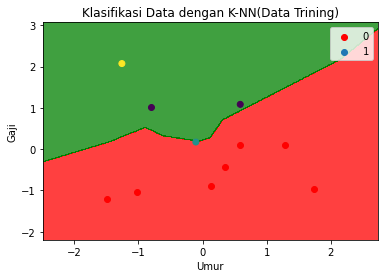

In [35]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start=x_set[:, 0].min()-1, stop=x_set[:, 0].max()+1, step=0.01),
                     np.arange(start=x_set[:, 1].min()-1, stop=x_set[:,1].max()+1, step=0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape), 
             alpha = 0.75, cmap = ListedColormap(('red','green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
              c = ListedColormap(('red','green'))(i), label = j)
plt.title ('Klasifikasi Data dengan K-NN(Data Trining)')
plt.xlabel('Umur')
plt.ylabel('Gaji')
plt.legend()
plt.show()
        

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


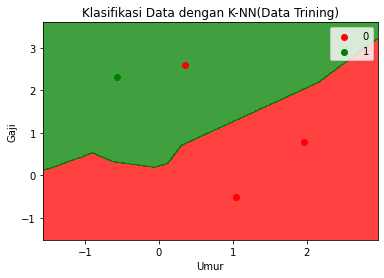

In [36]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_test
x1, x2 = np.meshgrid(np.arange(start=x_set[:, 0].min()-1, stop=x_set[:, 0].max()+1, step=0.01),
                     np.arange(start=x_set[:, 1].min()-1, stop=x_set[:,1].max()+1, step=0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape), 
             alpha = 0.75, cmap = ListedColormap(('red','green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
              c = ListedColormap(('red','green'))(i), label = j)
plt.title ('Klasifikasi Data dengan K-NN(Data Testing)')
plt.xlabel('Umur')
plt.ylabel('Gaji')
plt.legend()
plt.show()